# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [23]:
import pandas as np
import seaborn as sns

## Load the Data

In [24]:
df=np.read_csv("/content/Traffic_Accident.csv")

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [25]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


In [26]:
df.shape

(52000, 30)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   52000 non-null  int64  
 1   Accident_Index                               52000 non-null  object 
 2   Location_Easting_OSGR                        52000 non-null  float64
 3   Location_Northing_OSGR                       52000 non-null  float64
 4   Longitude                                    52000 non-null  float64
 5   Latitude                                     52000 non-null  float64
 6   Police_Force                                 52000 non-null  int64  
 7   Accident_Severity                            52000 non-null  int64  
 8   Number_of_Vehicles                           51198 non-null  float64
 9   Number_of_Casualties                         52000 non-null  int64  
 10

In [28]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,52000.0,52309.605596,30282.566278,0.000000,25924.750000,52285.500000,78552.250000,104949.000000
Location_Easting_OSGR,52000.0,439654.064615,66711.811588,296780.000000,388110.000000,429505.000000,516010.000000,559570.000000
Location_Northing_OSGR,52000.0,338794.330769,115731.113185,156110.000000,194160.000000,361950.000000,415952.500000,656390.000000
Longitude,52000.0,-1.425829,0.975537,-3.596752,-2.179555,-1.552874,-0.312861,0.350177
Latitude,52000.0,52.940991,1.044812,51.289060,51.630849,53.149640,53.638514,55.800830
Police_Force,52000.0,11.101904,9.558172,1.000000,1.000000,10.000000,20.000000,48.000000
Accident_Severity,52000.0,2.848481,0.390890,1.000000,3.000000,3.000000,3.000000,3.000000
Number_of_Vehicles,51198.0,1.843060,0.708149,1.000000,1.000000,2.000000,2.000000,18.000000
Number_of_Casualties,52000.0,1.358615,0.804162,1.000000,1.000000,1.000000,1.000000,23.000000
Day_of_Week,51463.0,4.120009,1.934134,1.000000,2.000000,4.000000,6.000000,7.000000


In [29]:
df.dtypes

,0
Unnamed: 0,int64
Accident_Index,object
Location_Easting_OSGR,float64
Location_Northing_OSGR,float64
Longitude,float64
Latitude,float64
Police_Force,int64
Accident_Severity,int64
Number_of_Vehicles,float64
Number_of_Casualties,int64


In [30]:
df.isnull().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,802
Number_of_Casualties,0


In [31]:
df.duplicated().sum()

0

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [32]:
df.isnull().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,802
Number_of_Casualties,0


In [33]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy='mean')

df['Speed_limit']=imputer.fit_transform(df[['Speed_limit']])
df['Number_of_Vehicles']=imputer.fit_transform(df[['Number_of_Vehicles']])
df['Day_of_Week']=imputer.fit_transform(df[['Day_of_Week']]) # I decided to impute these since they had a high num of nulls


#i will drop the rest

df.dropna(inplace=True)



In [34]:
df.isnull().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0


In [35]:
corr=df.corr(numeric_only=True,)


<Axes: >

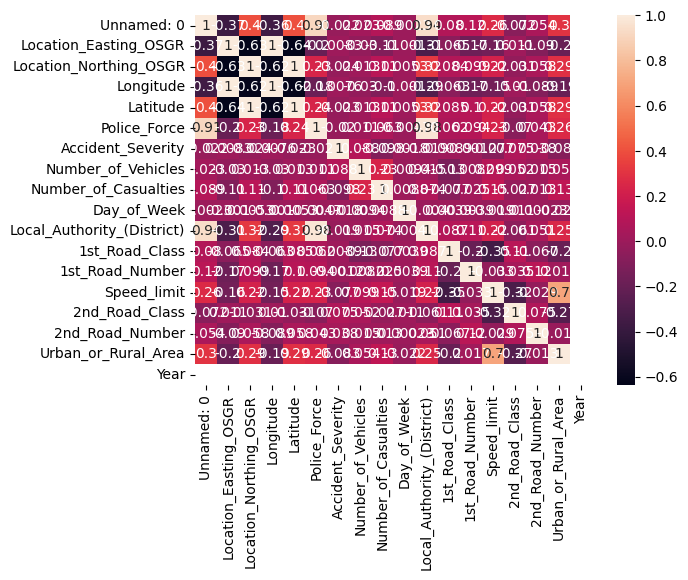

In [36]:
sns.heatmap(corr,annot=True)

In [37]:
#I will drop columns that i think dont influence location,correlation also
df2=np.DataFrame()
df2[['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude',
                  'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
                  'Road_Type', 'Speed_limit', 'Weather_Conditions', 'Urban_or_Rural_Area']]=df[['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude',
                  'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
                  'Road_Type', 'Speed_limit', 'Weather_Conditions', 'Urban_or_Rural_Area']]






In [38]:
df2

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Road_Type,Speed_limit,Weather_Conditions,Urban_or_Rural_Area
0,381880.0,298700.0,-2.268891,52.585773,3,2.0,2,Single carriageway,60.0,Fine without high winds,2.0
1,413520.0,284740.0,-1.802453,52.460412,2,1.0,1,Slip road,20.0,Fine without high winds,1.0
2,516260.0,177370.0,-0.327073,51.483290,3,2.0,2,Dual carriageway,30.0,Fine without high winds,1.0
3,401530.0,282610.0,-1.978930,52.441426,3,2.0,1,Dual carriageway,40.0,Fine without high winds,1.0
4,421760.0,320680.0,-1.678823,52.783240,3,1.0,1,Dual carriageway,70.0,Fine without high winds,2.0
...,...,...,...,...,...,...,...,...,...,...,...
51995,427910.0,515740.0,-1.570167,54.536179,3,2.0,1,Single carriageway,30.0,Fine without high winds,1.0
51996,450720.0,340010.0,-1.246470,52.955054,3,1.0,1,Single carriageway,30.0,Fine without high winds,1.0
51997,526580.0,177540.0,-0.178465,51.482604,3,1.0,1,Single carriageway,30.0,Raining without high winds,1.0
51998,426800.0,463700.0,-1.591972,54.068547,3,2.0,2,Single carriageway,60.0,Fine without high winds,2.0


In [39]:
col_name=df.columns

In [40]:
df2.dtypes

,0
Location_Easting_OSGR,float64
Location_Northing_OSGR,float64
Longitude,float64
Latitude,float64
Accident_Severity,int64
Number_of_Vehicles,float64
Number_of_Casualties,int64
Road_Type,object
Speed_limit,float64
Weather_Conditions,object


In [41]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder

e=OrdinalEncoder()
Le=LabelEncoder()




In [42]:
df2['Road_Type']=e.fit_transform(df2[['Road_Type']])
df2['Weather_Conditions']=e.fit_transform(df2[['Weather_Conditions']])

<Axes: >

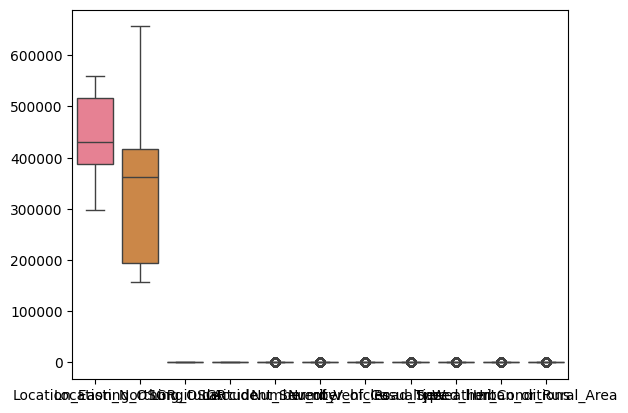

In [43]:
sns.boxplot(data=df2)

In [44]:
df2

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Road_Type,Speed_limit,Weather_Conditions,Urban_or_Rural_Area
0,381880.0,298700.0,-2.268891,52.585773,3,2.0,2,3.0,60.0,1.0,2.0
1,413520.0,284740.0,-1.802453,52.460412,2,1.0,1,4.0,20.0,1.0,1.0
2,516260.0,177370.0,-0.327073,51.483290,3,2.0,2,0.0,30.0,1.0,1.0
3,401530.0,282610.0,-1.978930,52.441426,3,2.0,1,0.0,40.0,1.0,1.0
4,421760.0,320680.0,-1.678823,52.783240,3,1.0,1,0.0,70.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
51995,427910.0,515740.0,-1.570167,54.536179,3,2.0,1,3.0,30.0,1.0,1.0
51996,450720.0,340010.0,-1.246470,52.955054,3,1.0,1,3.0,30.0,1.0,1.0
51997,526580.0,177540.0,-0.178465,51.482604,3,1.0,1,3.0,30.0,5.0,1.0
51998,426800.0,463700.0,-1.591972,54.068547,3,2.0,2,3.0,60.0,1.0,2.0


In [45]:
#handling outliers using IQR

Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
df = df2[~((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [46]:
df2.shape

(51944, 11)

In [47]:
df2

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Road_Type,Speed_limit,Weather_Conditions,Urban_or_Rural_Area
0,381880.0,298700.0,-2.268891,52.585773,3,2.0,2,3.0,60.0,1.0,2.0
1,413520.0,284740.0,-1.802453,52.460412,2,1.0,1,4.0,20.0,1.0,1.0
2,516260.0,177370.0,-0.327073,51.483290,3,2.0,2,0.0,30.0,1.0,1.0
3,401530.0,282610.0,-1.978930,52.441426,3,2.0,1,0.0,40.0,1.0,1.0
4,421760.0,320680.0,-1.678823,52.783240,3,1.0,1,0.0,70.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
51995,427910.0,515740.0,-1.570167,54.536179,3,2.0,1,3.0,30.0,1.0,1.0
51996,450720.0,340010.0,-1.246470,52.955054,3,1.0,1,3.0,30.0,1.0,1.0
51997,526580.0,177540.0,-0.178465,51.482604,3,1.0,1,3.0,30.0,5.0,1.0
51998,426800.0,463700.0,-1.591972,54.068547,3,2.0,2,3.0,60.0,1.0,2.0


## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [48]:
#done above

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

In [49]:
df2

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Road_Type,Speed_limit,Weather_Conditions,Urban_or_Rural_Area
0,381880.0,298700.0,-2.268891,52.585773,3,2.0,2,3.0,60.0,1.0,2.0
1,413520.0,284740.0,-1.802453,52.460412,2,1.0,1,4.0,20.0,1.0,1.0
2,516260.0,177370.0,-0.327073,51.483290,3,2.0,2,0.0,30.0,1.0,1.0
3,401530.0,282610.0,-1.978930,52.441426,3,2.0,1,0.0,40.0,1.0,1.0
4,421760.0,320680.0,-1.678823,52.783240,3,1.0,1,0.0,70.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
51995,427910.0,515740.0,-1.570167,54.536179,3,2.0,1,3.0,30.0,1.0,1.0
51996,450720.0,340010.0,-1.246470,52.955054,3,1.0,1,3.0,30.0,1.0,1.0
51997,526580.0,177540.0,-0.178465,51.482604,3,1.0,1,3.0,30.0,5.0,1.0
51998,426800.0,463700.0,-1.591972,54.068547,3,2.0,2,3.0,60.0,1.0,2.0


<Axes: xlabel='Longitude', ylabel='Latitude'>

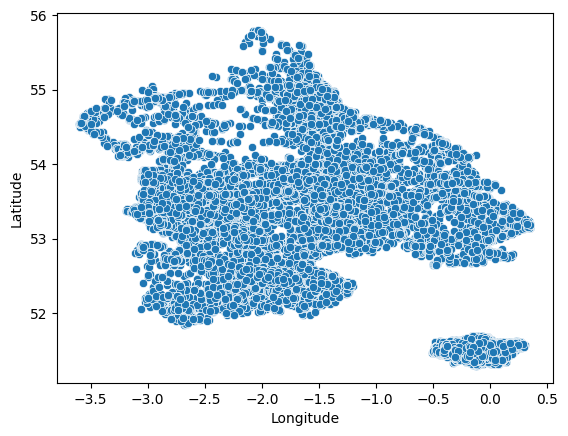

In [50]:
df2=np.DataFrame(df2)

sns.scatterplot(data=df2,x='Longitude' ,y='Latitude')


In [51]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()

df2=scaler.fit_transform(df2)

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [52]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

df_pca=pca.fit_transform(df2)



In [58]:
from sklearn.cluster import KMeans

inertias = []

for k in range(2,15):
  km = KMeans(n_clusters=k)
  km.fit(df_pca)
  inertias.append(km.inertia_)

inertias

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[118624.95097780513,
 49504.33216208212,
 36773.73154929489,
 26372.105292961918,
 19355.003338644583,
 14582.357709014721,
 12089.180097806731,
 9958.283331207049,
 8254.223220537046,
 7200.089163188909,
 6417.208557752507,
 5682.92377415293,
 5017.993371025108]

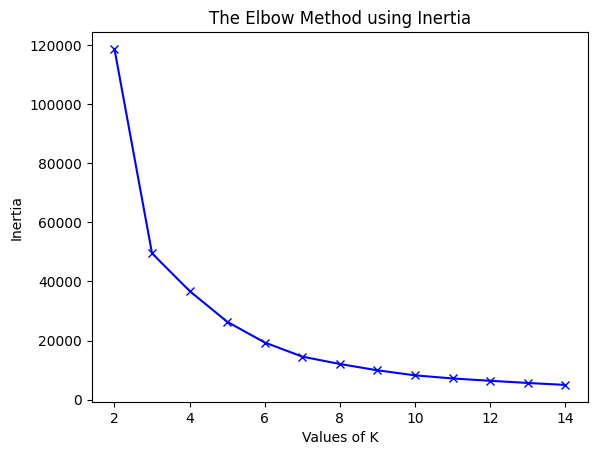

In [59]:
import matplotlib.pyplot as plt

K = range(2,15)
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [60]:

km = KMeans(n_clusters=3, random_state=0)


In [61]:
km.fit(df_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [63]:
from sklearn.metrics import silhouette_score

score=silhouette_score(df_pca, km.fit_predict(df_pca))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [64]:
score

0.6987142970875916

## Plot the data points with their predicted cluster center

In [66]:
df_pca=np.DataFrame(df_pca)

In [77]:
labels=km.labels_

In [83]:
df_pca.shape


(51944, 2)

In [86]:
sns.scatterplot(data=df_pca,x=df_pca[:,0],y=df_pca[:,1])



KeyError: (slice(None, None, None), 0)

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?